In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("visitors.csv")
df.head()

,date,weather,temperature,visitors
0,2022-08-10,曇り,24.782648,32
1,2022-08-11,曇り,22.804434,58
2,2022-08-12,曇り,21.460733,61
3,2022-08-13,曇り,23.352008,75
4,2022-08-14,曇り,24.869970,39


In [12]:
from darts.timeseries import TimeSeries

In [13]:
series = TimeSeries.from_dataframe(df, time_col="date", value_cols=["visitors"])

<Axes: xlabel='date'>

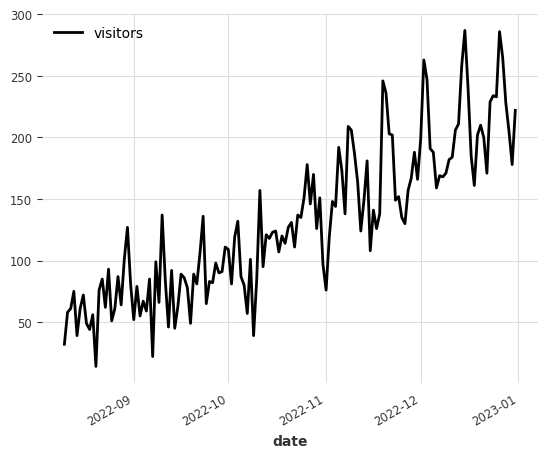

In [14]:
series.plot()

In [15]:
from darts.models import ExponentialSmoothing

In [16]:
model = ExponentialSmoothing()
model.fit(series)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0, kwargs=None)

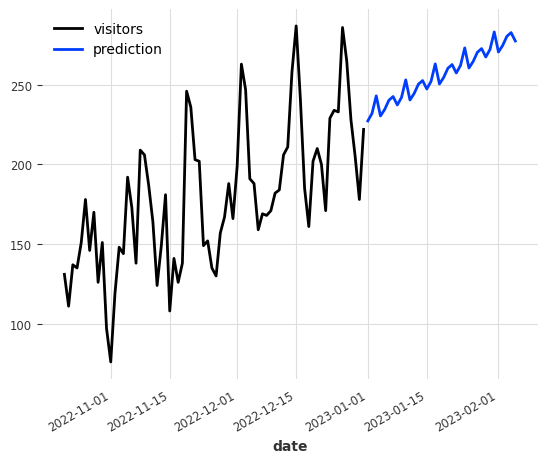

In [17]:
prediction = model.predict(36)
series[-72:].plot()
prediction.plot(label="prediction")
plt.legend()

<Axes: xlabel='date'>

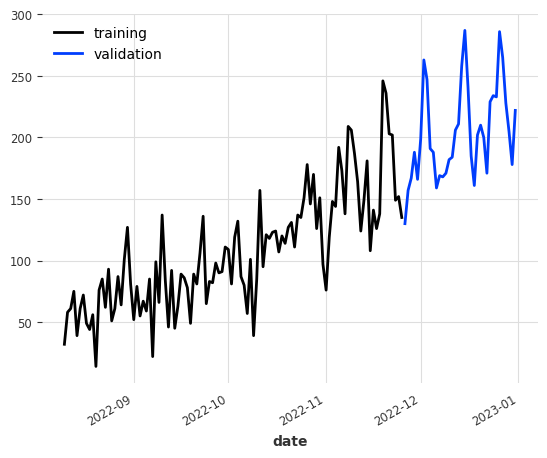

In [18]:
train, test = series[:-36], series[-36:]
train.plot(label="training")
test.plot(label="validation")

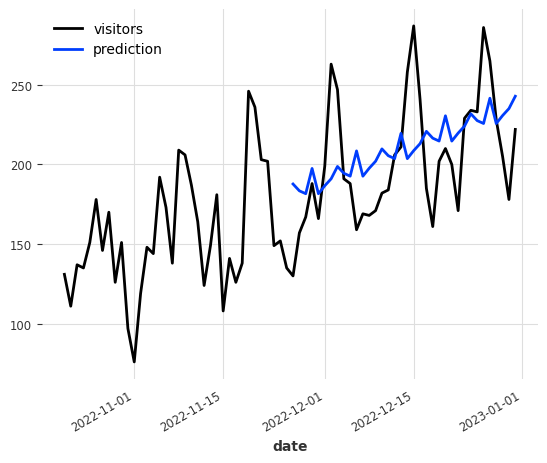

In [19]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(36)
series[-72:].plot()
prediction.plot(label="prediction")
plt.legend()

In [20]:
from darts.metrics import mape

In [21]:
mape(prediction, series)

13.45897011620505